In [1]:
#euler test
import numpy as np

r = np.asarray([0,0,1])
center = np.asarray([0,0,0])
r_centered = r-center
print(r_centered)

a = 90
b = 0
y = -90

from scipy.spatial.transform import Rotation

A = Rotation.from_euler('XYZ',[y, b, a], degrees=True)

rotation_matrix = A.as_matrix()
print(rotation_matrix)


#[190.64 149.49 202.24] -> [280.64        99.50677852 342.22322148]


r_centered_rotated = rotation_matrix@r_centered
r_centered_rotated_shifted = r_centered_rotated+center

print(r_centered_rotated_shifted)

[0 0 1]
[[ 2.22044605e-16 -1.00000000e+00  0.00000000e+00]
 [ 2.22044605e-16  0.00000000e+00  1.00000000e+00]
 [-1.00000000e+00 -2.22044605e-16  2.22044605e-16]]
[0.00000000e+00 1.00000000e+00 2.22044605e-16]


In [2]:
# ONE MAGNET STRONG IN THE AIR
# 1. import the b0 map

import numpy as np  
import b0
b0map_banana = b0.b0()
#filename_to_import_csv_data_from = r'./data/240731/newinit_norings_240812_bvals_shifted.csv'
filename_to_import_csv_data_from = r'./data/240731/ONE_INSERT_Z-260Y0X-90_R120_12pts_bvals_shifted.csv'

b0map_banana.import_from_csv(filename_to_import_csv_data_from,eulers=[90,0,-90])
b0map_banana.transfer_coordinates_of_the_path_from_cosi_to_magnet(filtering=1.1,onesign=True)


# change coordinates to magnet


No path object given on construction of b0 object.
 b0 instance initialized without path.
importing b0 object from csv file./data/240731/ONE_INSERT_Z-260Y0X-90_R120_12pts_bvals_shifted.csv
No path object given on construction of b0 object.
 b0 instance initialized without path.
warning. path file  /home/cosi/cosi-measure/Software/COSI2/data/240731/ONE_INSERT_Z-260Y0X-90_R120_12pts,,,,,,
 not used. path data taken from csv!
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
importing path from a csv file
ROTATING THE PATH NOW!
path center set to:  [-1.77015747e-13  0.00000000e+00 -1.6778523

c:\cosi-measure\Software\COSI2\b0.py:316: RuntimeWarning: divide by zero encountered in scalar divide
  if meanField_raw/abs(self.fieldDataAlongPath[idx,0])>filtering:


-0.3333333333333333
-0.3333333333333333
-0.3333333333333333
-1.0
-0.3333333333333333
-0.8333333333333334
-1.0
-1.4999999999999998
-0.8333333333333334
-1.4999999999999998
-2.0
-2.3333333333333335
-2.5
-2.3333333333333335
-2.6666666666666665
-3.3333333333333335
-4.166666666666667
-4.333333333333333
-4.833333333333333
-5.166666666666667
-5.5
-5.666666666666667
-5.166666666666667
-4.166666666666667
-4.333333333333333
-3.6666666666666665
-3.3333333333333335
-2.9999999999999996
-2.9999999999999996
-2.6666666666666665
-2.3333333333333335
-1.8333333333333333
-1.8333333333333333
-1.8333333333333333
-1.1666666666666667
-2.0
-0.6666666666666666
-1.8333333333333333
-0.8333333333333334
-0.6666666666666666
-0.16666666666666666
0.003 is wrong sign! assigning -0.006 !!!
assigned:  [-0.001  0.042  0.003  0.042] <+-+-+-
-0.16666666666666666
-0.16666666666666666
b0 importer: warning! 0 VALUE detected! pt 3194, assigning [-0.001  0.043  0.003  0.049]
-0.0
0.003 is wrong sign! assigning -0.006 !!!
assigned

In [3]:
print(np.nanmin(b0map_banana.fieldDataAlongPath[:,0]))
print(np.nanmax(b0map_banana.fieldDataAlongPath[:,0]))
print(np.nanmin(b0map_banana.b0Data[:,:,:,0]))
print(np.nanmax(b0map_banana.b0Data[:,:,:,0]))



-0.068
0.0
-0.068
-0.001


In [4]:

# spherical decomposition
diameter_of_sphere = b0map_banana.path.radius*2
order = 17
resolution_of_sph_decomp = 10
print(diameter_of_sphere)

#b0map_before.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)
#b0map_after.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)
b0map_banana.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)

resolution_of_sph_fit=10
print('interpolating field with sph order %d, resol %.0f mm'%(order,resolution_of_sph_fit))

#b0map_before.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)
#b0map_after.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)
b0map_banana.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)


240.02237266786005
(25, 24, 25)
Mean field strength in 24 cm sphere: -0.01 mT
Inhomogeneity in 24 cm sphere: -5256368 ppm
Inhomogeneity of fit: 6055140 ppm
Error: -2107252 ppm
saved numpy array as ./data/tmp/SpHData.npy
interpolating field with sph order 17, resol 10 mm
sph coefficients loaded
making a fine coordinate grid
Inhomogeneity of fit: 3995127 ppm
saved numpy array as ./data/tmp/B0_interpolated.npy


19.266781341069166
mean, mT:  -0.012705682656826568
low, mT: -0.068 
high, mT: -0.001


<Figure size 640x480 with 0 Axes>

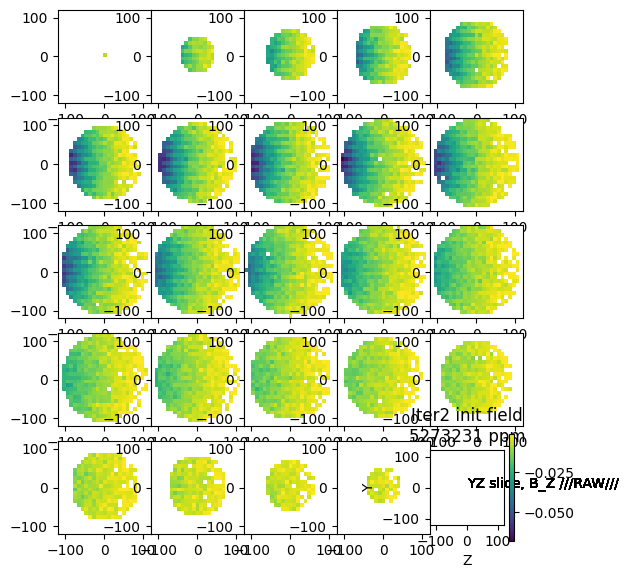

In [5]:
# initial field (RAW)
# save initial field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)


xvals = b0map_banana.xDim_SPH_fine
#FieldMeasured = b0map_iter1.interpolatedField
FieldMeasured = b0map_banana.b0Data[:,:,:,0]


fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(6, 7))

#xvals = b0map_comsol.xDim_SPH_fine
print((len(b0map_banana.path.r))**(1/3))


print('mean, mT: ',np.nanmean(FieldMeasured))
print('low, mT:',np.nanmin(FieldMeasured),'\nhigh, mT:',np.nanmax(FieldMeasured))


for i in range(5):
    for j in range(5):
        xxx = axes[i,j].imshow(FieldMeasured[i*5+j,:,:],clim=[np.nanmin(FieldMeasured),np.nanmax(FieldMeasured)],origin = 'lower',extent=[-120,120,-120,120])
        plt.text(0,0,'YZ slice, B_Z ///RAW///')
        axes[i,j].xaxis.set_visible(True)
        axes[i,j].yaxis.set_visible(True)
        plt.xlabel('Z')
        plt.ylabel('Y')
        
plt.subplots_adjust(wspace=0, hspace=0)


        
plt.subplots_adjust(wspace=0, hspace=0)

initHomo = abs((np.nanmax(FieldMeasured)-np.nanmin(FieldMeasured))/np.nanmean(FieldMeasured))*1e6
plt.title('Iter2 init field\n%.0f ppm'%initHomo)
plt.colorbar(mappable = xxx)

plt.savefig('./pics/iter2_init_field_raw.png',format="png")
plt.savefig('./pics/iter2_init_field_raw.pdf',format="pdf")
plt.show()




19.266781341069166
mean, mT:  -0.012355233487865677
low, mT: -0.05086439719457213 
high, mT: -0.001503670245482828


<Figure size 640x480 with 0 Axes>

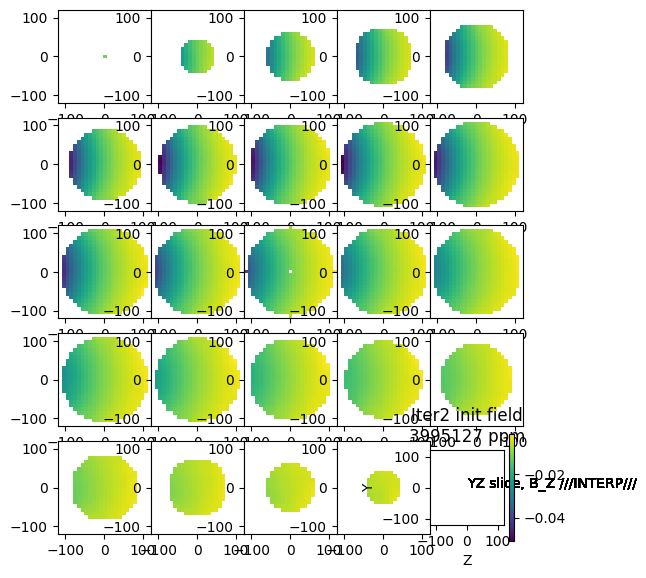

In [28]:

# initial field (INTERPOLATED)
# save initial field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)


xvals = b0map_banana.xDim_SPH_fine
FieldMeasured = b0map_banana.interpolatedField
#FieldMeasured = b0map_iter1.b0Data[:,:,:,0]


fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(6, 7))

#xvals = b0map_comsol.xDim_SPH_fine
print((len(b0map_banana.path.r))**(1/3))


print('mean, mT: ',np.nanmean(FieldMeasured))
print('low, mT:',np.nanmin(FieldMeasured),'\nhigh, mT:',np.nanmax(FieldMeasured))

for i in range(5):
    for j in range(5):
        xxx = axes[i,j].imshow(FieldMeasured[i*5+j,:,:],clim=[np.nanmin(FieldMeasured),np.nanmax(FieldMeasured)],origin = 'lower',extent=[-120,120,-120,120])
        plt.text(-0,0,'YZ slice, B_Z ///INTERP///')
        axes[i,j].xaxis.set_visible(True)
        axes[i,j].yaxis.set_visible(True)
        plt.xlabel('Z')
        plt.ylabel('Y')
        
plt.subplots_adjust(wspace=0, hspace=0)

initHomo = abs((np.nanmax(FieldMeasured)-np.nanmin(FieldMeasured))/np.nanmean(FieldMeasured))*1e6
plt.title('Iter2 init field\n%.0f ppm'%initHomo)
plt.colorbar(mappable = xxx)

plt.savefig('./pics/iter2_init_field_raw.png',format="png")
plt.savefig('./pics/iter2_init_field_raw.pdf',format="pdf")
plt.show()










In [ ]:

#??? lets generate fields of all inserts, all rings.
#??? Insert X ring 0, minimal Z, Y~0, all rotations pointing to -Z direction (alpha=-pi/2) 0 reference

In [29]:
# shim magnets positinoing

mu                  = 1e-7

magSizeOuter        = 6*1e-3        #size of shim magnets

bRem                = 1.35 # [T]      #remanence field of shim magnets

#shim tray configuration
def ringposFromTrayNr(trays_ocp):
    trayslitspacing = 9e-3 # [m]
    coordinates = []
    for tray_pos in trays_ocp:
        coordinate = trayslitspacing*tray_pos-4.5e-3 if tray_pos>0 else trayslitspacing*tray_pos+4.5e-3
        coordinates.append(coordinate)
    return coordinates


shimRadius          = 260*1e-3#276*1e-3#!!!TMP 276*1e-3#276*1e-3 <- was set by Tom!      # radius on which the shim magnets are placed

trays_occupied = [1]#[-7,-5,1,14] #[-18,-5,1,12] <- 27mm best  [-7,-5,1,14] 997
ringPositions       = ringposFromTrayNr(trays_occupied)#[-121.5*1e-3, -40.5*1e-3, 31.5*1e-3, 121.5*1e-3]#np.linspace(-ringspacingouter,ringspacingouter,4)#np.linspace(-0.1755,0.1755,4)          #np.linspace(-0.2295, .2295, 4) #Z positions to place shin rubgs
print(np.array(ringPositions)*1e3)


[4.5]


In [30]:

magsPerSegment      = 7             # number of magnets peer shim tray segment
anglePerSegment     = 19.25 #the angular distance in degrees between the furthest magnets in a shim tray (span of magnets in shim tray)
numSegments         = 12 #corresponds to the number of shim trays


segmentAngles       = np.linspace(0,360, numSegments, endpoint = False)

magAngles           = np.linspace(-anglePerSegment/2, anglePerSegment/2, magsPerSegment) 

print('let us position some magnets on a circumference of a R=%.0f mm YZ circle with X=0'%(shimRadius*1000))

positions = []
insert_nr = 9 # IRL 3!!!
for ringPosition in ringPositions:
    for segmentAngle in segmentAngles:
        for magAngle in magAngles:
            position = [ringPosition,shimRadius*np.cos((segmentAngle+magAngle)*np.pi/180), shimRadius*np.sin((segmentAngle+magAngle)*np.pi/180)]
            # ONLY INSERT 3, y~0, min(|z|)
            if (segmentAngle > 360/12*(insert_nr-0.5)) and (segmentAngle < 360/12*(insert_nr+0.5)):
                # choose only Ring 0:
                if ringPosition == ringPositions[0]:
                    position[0] = -0.05 #!!!!! TEMP!!!!!
                    #position[1] +=0.0 #!!!!! TEMP!!!!!
                    position[2] -=0.03 #!!!!! TEMP!!!!!
                    
                    #print(360/12*(insert_nr-0.5),360/12*(insert_nr+0.5))
                    positions.append(position)
                
print(len(positions))

for pos in positions:
    print(pos[0],pos[1],pos[2])


let us position some magnets on a circumference of a R=260 mm YZ circle with X=0
7
-0.05 -0.04347172771726346 -0.28634002592118957
-0.05 -0.029057080742575334 -0.2883712175508709
-0.05 -0.014551347648475061 -0.2895924850253051
-0.05 -4.7761225166746774e-17 -0.29000000000000004
-0.05 0.014551347648474966 -0.2895924850253051
-0.05 0.02905708074257524 -0.2883712175508709
-0.05 0.04347172771726337 -0.28634002592118957


magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
computing field of one shim magnet at  -0.05 -0.04347172771726346 -0.28634002592118957
magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
computing field of one shim magnet at  -0.05 -0.029057080742575334 -0.2883712175508709
magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
computing field of one shim magnet at  -0.05 -0.014551347648475061 -0.2895924850253051
magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
computing field of one shim magnet at  -0.05 -4.7761225166746774e-17 -0.29000000000000004
magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
computing field of one shim magnet at  -0.05 0.014551347648474966 -0.2895924850253051
magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
computing f

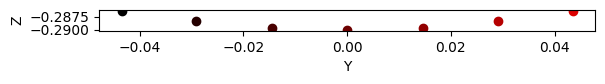

In [31]:

import matplotlib.pyplot as plt
axs = plt.axes()
for idx,position in enumerate(positions):

    axs.scatter(position[1],position[2],color = [idx/len(positions),0,0])

axs.set_aspect(1)
plt.xlabel('Y')
plt.ylabel('Z')


initialField = b0map_banana.interpolatedField
numMags = len(positions)

# making coordinate grid
xPts = b0map_banana.xDim_SPH_fine# np.linspace(min(xvals),max(xvals),int((max(xvals)-min(xvals))/resol))
yPts = b0map_banana.yDim_SPH_fine# np.linspace(min(yvals),max(yvals),int((max(yvals)-min(yvals))/resol))
zPts = b0map_banana.zDim_SPH_fine# np.linspace(min(zvals),max(zvals),int((max(zvals)-min(zvals))/resol))


xgrid,ygrid,zgrid = np.meshgrid(xPts,yPts,zPts,indexing='ij')

coordinate_grid = [xgrid,ygrid,zgrid]

magnetFields = np.zeros((np.shape(initialField)+(3,numMags)), dtype = np.float32)

from utils import shimming_magnet

shimming_magnets = []

for idx1, position in enumerate(positions):
    magnet = shimming_magnet.shimming_magnet(position=position,rotation_yz=0)
    magnet.bRem = bRem # 1.35 T
    magnet.render_field(grid=coordinate_grid)
    magnetFields[:,:,:,:,idx1] = magnet.OLD_singleMagnet(position=position,grid = coordinate_grid)[:,:,:,:] #singleMagnet(position, grid=coordinate_grid)

    shimming_magnets.append(magnet)

magnetFields *= 1e3


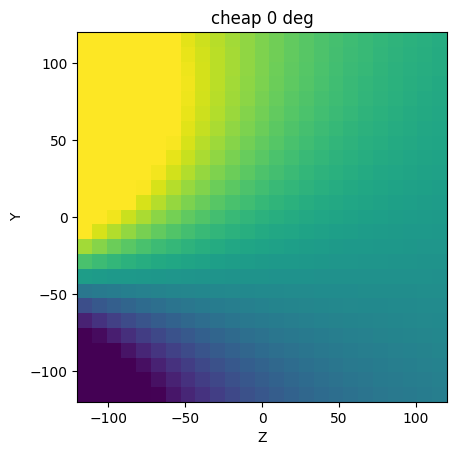

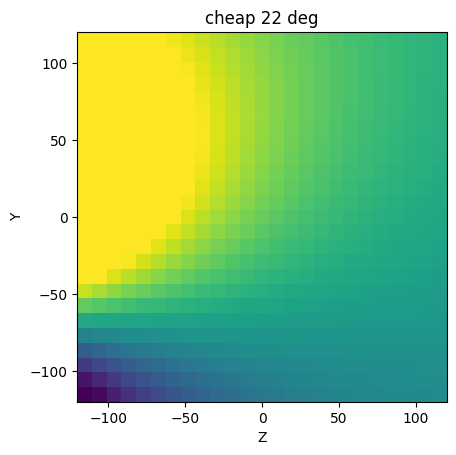

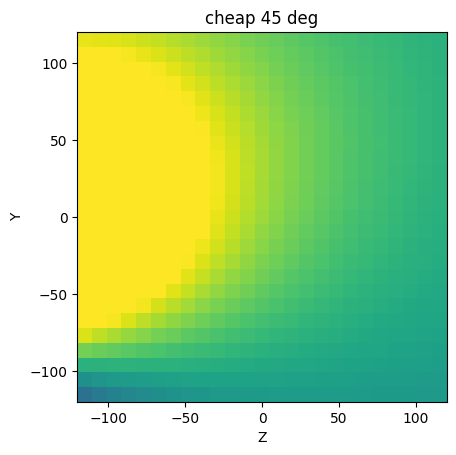

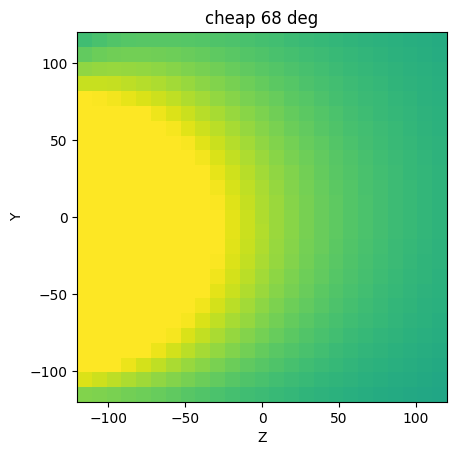

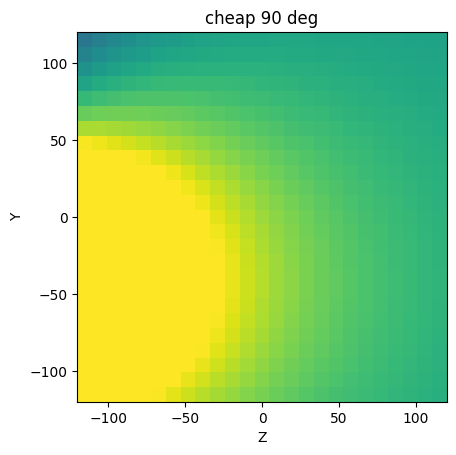

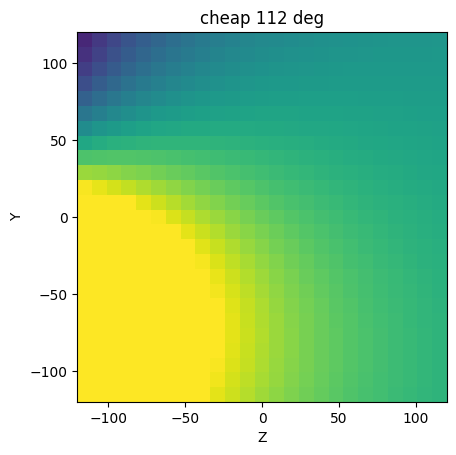

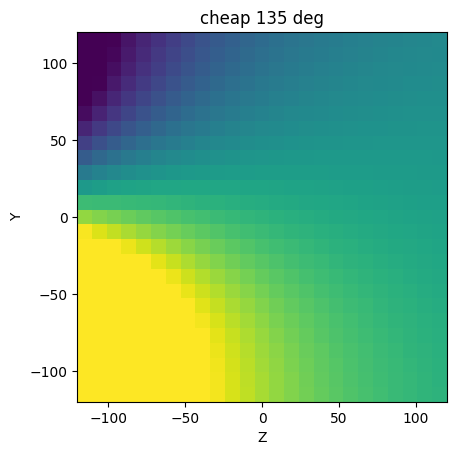

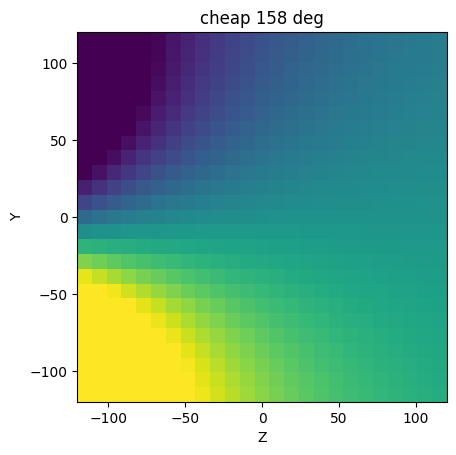

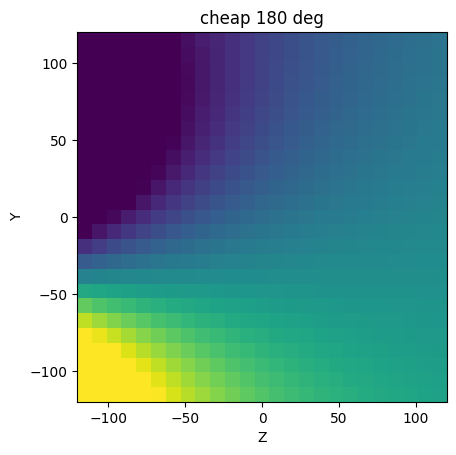

In [32]:
# cheap vs real fields
# DO NOT RUN
plt.cla()

magnet_index = 0
yzsliceidx = 19

for i in range(9):
    alpha = i*np.pi/8
    
    cheapfield = magnetFields[yzsliceidx,:,:,2,magnet_index]*np.cos(alpha)-magnetFields[yzsliceidx,:,:,1,magnet_index]*np.sin(alpha)   
     
    plt.imshow(cheapfield,vmin=-1e-3, vmax=1e-3,extent=[min(zPts),max(zPts),min(yPts),max(yPts)],origin='lower')
    plt.title('cheap %.0f deg'%(alpha*180/np.pi))
    plt.xlabel('Z')
    plt.ylabel('Y')
    
    plt.show()



[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]


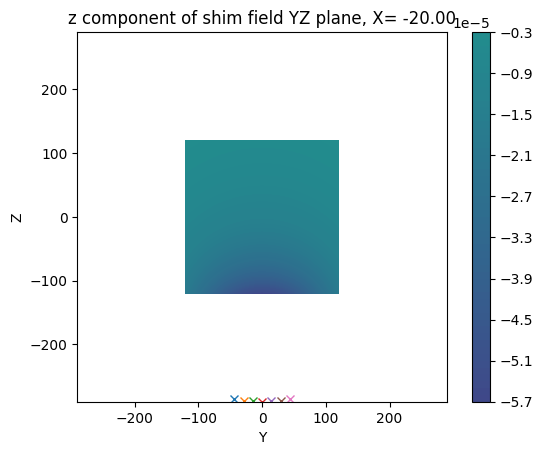

In [33]:
# visualize the field of one insert
resolution = 1/resolution_of_sph_fit*1e3

X = b0map_banana.xDim_SPH_fine*1e0
Y = b0map_banana.yDim_SPH_fine*1e0
Z = b0map_banana.zDim_SPH_fine*1e0

ONEINSERTFIELD = magnetFields[:,:,:,:,0]*0

ax = plt.figure().add_subplot()

for idx in range(len(positions)):

    position = positions[idx]
    y2d, z2d = np.meshgrid(Y,Z,indexing='ij') #!!!!!!!!!!!

    shimming_magnets[idx].rotation_yz = -np.pi/2#np.pi/4

    shimming_magnets[idx].render_field(grid=coordinate_grid)
    print(shimming_magnets[idx])
    ONEINSERTFIELD += shimming_magnets[idx].B0_expensive  #magnetFields[:,:,:,:,idx]#+magnetFields[:,:,:,:,idx+14]

    
    ax.plot(position[1]*1000,position[2]*1000,'x')
    
scale = 1e-4
yzsliceindex = 10
mpbl = ax.contourf(y2d,z2d,(ONEINSERTFIELD[yzsliceindex,:,:,2]),cmap='viridis',levels=64,vmin = -scale, vmax= scale)

plt.colorbar(mappable=mpbl)
#ax.plot(min(Y),min(Z),'ko')
#ax.plot(max(Y),max(Z),'ko')

ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_xlim(-290,290)
ax.set_ylim(-290,290)
ax.set_aspect(1)
                
ax.set_title('z component of shim field YZ plane, X= %.2f'%(X[yzsliceindex]))

plt.savefig('./pics/field_of_ALL_INSERTS_ITER2_INITIAL.png',format="png")
plt.savefig('./pics/field_of_ALL_INSERTS_ITER2_INITIAL.pdf',format="pdf")

plt.show()

In [34]:
# RENDERING FIELDS OF SHIM MAGNETS

MagnetsField_simulated_fair = shimming_magnets[0].B0[:,:,:,2]*0
    

for magnet_index, pos in enumerate(positions):
    alpha = -np.pi/2#-np.pi/2#np.pi/2#np.pi/2#!TEMP-np.pi/2
    #cheapfield_onemagnet = magnetFields[yzsliceidx,:,:,2,magnet_index]*np.cos(alpha)-magnetFields[yzsliceidx,:,:,1,magnet_index]*np.sin(alpha)   
    #MagnetsField_simulated += cheapfield_onemagnet
    
    
    position = positions[magnet_index]
    y2d, z2d = np.meshgrid(Y,Z,indexing='ij') #!!!!!!!!!!!

    shimming_magnets[magnet_index].rotation_yz = alpha#np.pi/4

    shimming_magnets[magnet_index].render_field(grid=coordinate_grid)
    print(shimming_magnets[magnet_index])
    MagnetsField_simulated_fair += shimming_magnets[magnet_index].B0_expensive[:,:,:,2]  #magnetFields[:,:,:,:,idx]#+magnetFields[:,:,:,:,idx+14]

MagnetsField_simulated_fair*=1e3
    
    
#mask the one magnet field:
MagnetsField_simulated_fair*= b0map_banana.sphere_mask
#MagnetsField_simulated*=1e3 

homo_oneMagnet = (np.nanmax(MagnetsField_simulated_fair)-np.nanmin(MagnetsField_simulated_fair))/np.nanmean(MagnetsField_simulated_fair)*1e6
print('homo of one magnet ppm %.0f'%(abs(homo_oneMagnet)))
print('mean mT %.2f'%(abs(np.nanmin(MagnetsField_simulated_fair))))


[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
homo of one magnet ppm 4008151
mean mT 0.05


25


<Figure size 640x480 with 0 Axes>

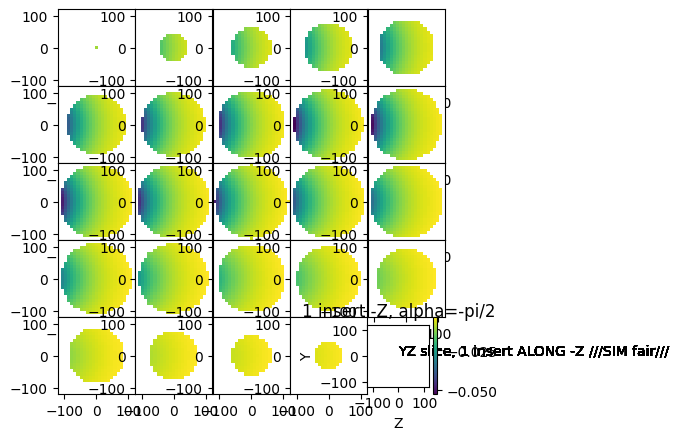

In [35]:
# what we expect with insert at min_z 0y ring 0:
plt.figure(0)

mapsize = int(np.sqrt(len(FieldMeasured[:,0,0])))
fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))

xvals = b0map_banana.xDim_SPH_fine

d = np.shape(coordinate_grid[0])
print(d[0])

        
for i in range(5):
    for j in range(5):
        xxx = axes[i,j].imshow(MagnetsField_simulated_fair[i*5+j,:,:],clim=[np.nanmin(MagnetsField_simulated_fair),np.nanmax(MagnetsField_simulated_fair)],origin = 'lower',extent=[-120,120,-120,120])
        plt.text(-0,0,'YZ slice, 1 insert ALONG -Z ///SIM fair///')
        axes[i,j].xaxis.set_visible(True)
        axes[i,j].yaxis.set_visible(True)
        plt.xlabel('Z')
        plt.ylabel('Y')

plt.subplots_adjust(wspace=0, hspace=0)
plt.title('1 insert -Z, alpha=-pi/2')
plt.colorbar(mappable=xxx)
plt.savefig('./pics/ALL_INSERTS_ALONG_-Y_SIM.png',format="png")
plt.savefig('./pics/ALL_INSERTS_ALONG_-Y_SIM.pdf',format="pdf")

plt.show()



In [54]:
# RENDERING quick FIELDS OF SHIM MAGNETS

MagnetsField_simulated = shimming_magnets[0].B0[:,:,:,2]*0
    

for magnet_index, pos in enumerate(positions):
    alpha = -np.pi/2#np.pi/2#np.pi/2#!TEMP-np.pi/2
    cheapfield_onemagnet = magnetFields[:,:,:,2,magnet_index]*np.cos(alpha)-magnetFields[:,:,:,1,magnet_index]*np.sin(alpha)   
    MagnetsField_simulated += cheapfield_onemagnet
    
    
    
#mask the one magnet field:
MagnetsField_simulated*= b0map_banana.sphere_mask
#MagnetsField_simulated*=1e3 

homo_oneMagnet = (np.nanmax(MagnetsField_simulated)-np.nanmin(MagnetsField_simulated))/np.nanmean(MagnetsField_simulated)*1e6
print('homo of one magnet ppm %.0f'%(abs(homo_oneMagnet)))
print('mean mT %.2f'%(abs(np.nanmin(MagnetsField_simulated))))


homo of one magnet ppm 3917779
mean mT 0.03


25


<Figure size 640x480 with 0 Axes>

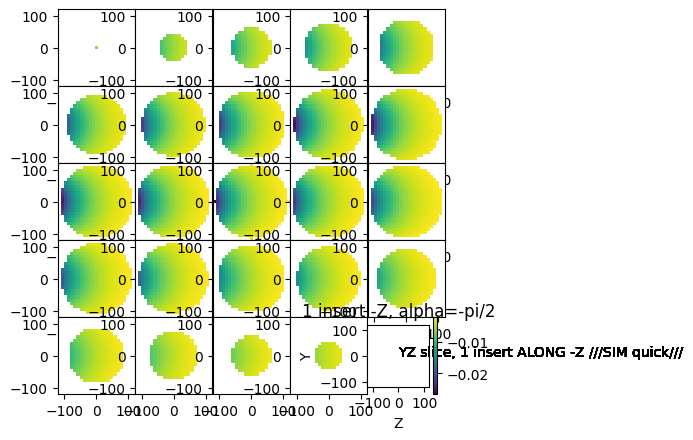

In [55]:
# what we expect with insert at min_z 0y ring 0:
plt.figure(0)

mapsize = int(np.sqrt(len(FieldMeasured[:,0,0])))
fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))

xvals = b0map_banana.xDim_SPH_fine

d = np.shape(coordinate_grid[0])
print(d[0])

        
for i in range(5):
    for j in range(5):
        xxx = axes[i,j].imshow(MagnetsField_simulated[i*5+j,:,:],clim=[np.nanmin(MagnetsField_simulated),np.nanmax(MagnetsField_simulated)],origin = 'lower',extent=[-120,120,-120,120])
        plt.text(-0,0,'YZ slice, 1 insert ALONG -Z ///SIM quick///')
        axes[i,j].xaxis.set_visible(True)
        axes[i,j].yaxis.set_visible(True)
        plt.xlabel('Z')
        plt.ylabel('Y')

plt.subplots_adjust(wspace=0, hspace=0)
plt.title('1 insert -Z, alpha=-pi/2')
plt.colorbar(mappable=xxx)
plt.savefig('./pics/ALL_INSERTS_ALONG_-Y_SIM.png',format="png")
plt.savefig('./pics/ALL_INSERTS_ALONG_-Y_SIM.pdf',format="pdf")

plt.show()


(25, 25, 25, 3, 7)
(7146, 14)


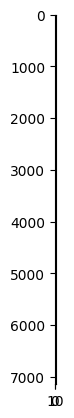

In [89]:
# now least squares for magnet rotation.
# generating the magnetic fields:
# magnet field is magnetFields[:,:,:,2,0]
# mask the magnet fields
DSV = b0map_banana.path.radius*2 # DEFINED ABOVE!
b0map = b0map_banana

DSV_INNER = b0map.path.radius*0.2 #!!!TEMP*1.96#1.95 # DEFINED ABOVE!
# make a spherical mask with diameter DSV
sphereMask = np.zeros(np.shape(coordinate_grid[0]), dtype = float)
sphereMask[np.square(coordinate_grid[0]) + np.square(coordinate_grid[1]) + np.square(coordinate_grid[2]) <= (DSV/2)**2] = 1 
sphereMask[np.square(coordinate_grid[0]) + np.square(coordinate_grid[1]) + np.square(coordinate_grid[2]) <= (DSV_INNER/2)**2] = 0 

sphereMask[sphereMask == 0] = np.nan

print(np.shape(magnetFields))

maskedFields =magnetFields[sphereMask == 1, :,:].astype(float) #!!! TEMP!!!!
maskedFields_stacked = np.hstack((maskedFields[:,1,:],maskedFields[:,2,:])) # WE HAVE Y AND Z
print(np.shape(maskedFields_stacked))

plt.imshow(maskedFields_stacked) #


In [90]:

# masking the magnet fields

print(np.shape(maskedFields_stacked))

vector_of_magnet_rotations = np.zeros(len(shimming_magnets))

stackedRotationVector = np.hstack([-np.sin(vector_of_magnet_rotations),np.cos(vector_of_magnet_rotations)])
print(np.shape(stackedRotationVector))

rotatedFieldOfShimMagnetsStacked = np.matmul(maskedFields_stacked,stackedRotationVector)

print(np.shape(rotatedFieldOfShimMagnetsStacked))

initialFieldMasked = FieldMeasured[sphereMask == 1].astype(float)
print(np.shape(initialFieldMasked))



(7146, 14)
(14,)
(7146,)
(7146,)


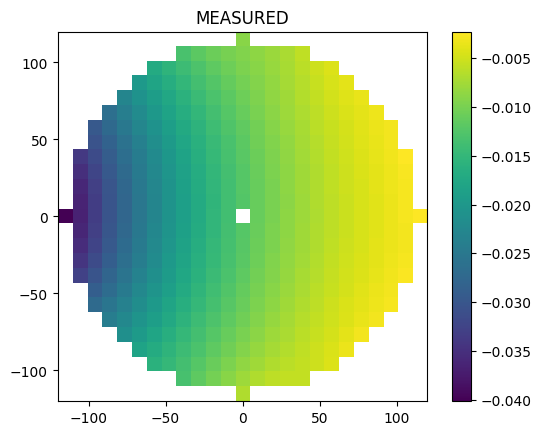

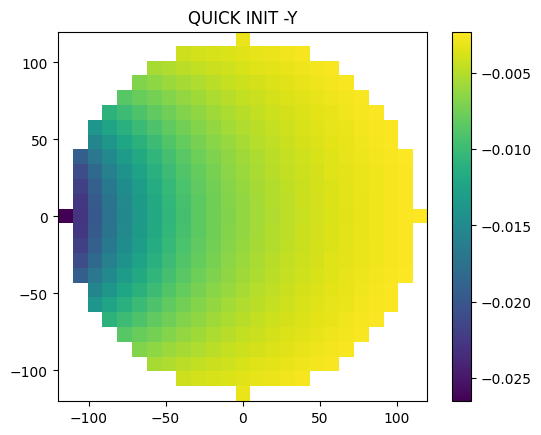

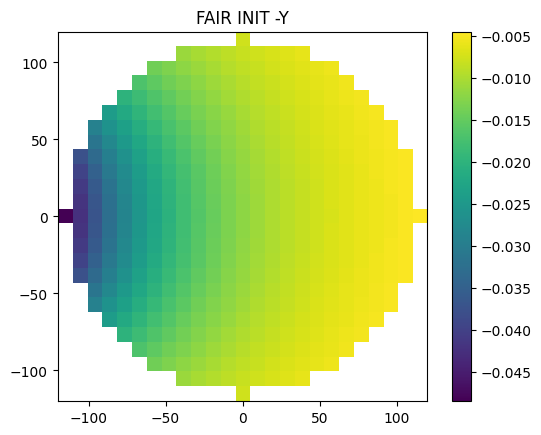

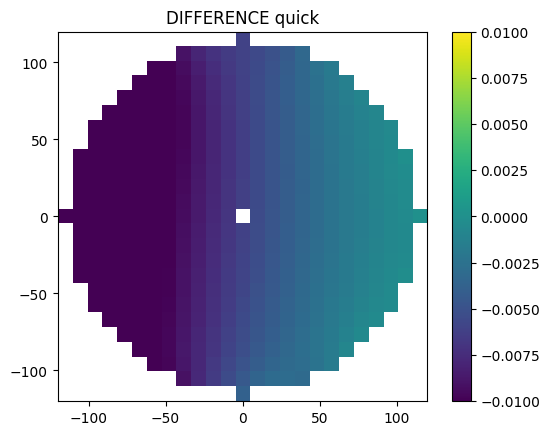

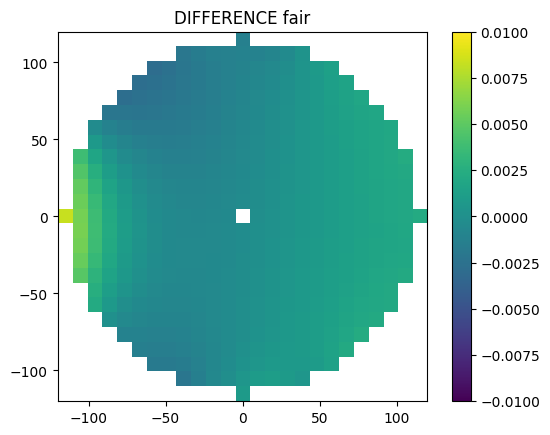

In [91]:
slcidx = 12
plt.imshow(FieldMeasured[slcidx,:,:],origin = 'lower',extent=[-120,120,-120,120])
plt.title('MEASURED')
plt.colorbar()
plt.show()
plt.imshow(MagnetsField_simulated[slcidx,:,:],origin = 'lower',extent=[-120,120,-120,120])
plt.title('QUICK INIT -Y')
plt.colorbar()
plt.show()
plt.imshow(MagnetsField_simulated_fair[slcidx,:,:],origin = 'lower',extent=[-120,120,-120,120])
plt.title('FAIR INIT -Y')
plt.colorbar()
plt.show()
plt.imshow(FieldMeasured[slcidx,:,:]-1*MagnetsField_simulated[slcidx,:,:],vmin=-0.01,vmax=0.01,origin = 'lower',extent=[-120,120,-120,120])
plt.colorbar()
plt.title('DIFFERENCE quick')
plt.show()
plt.imshow(FieldMeasured[slcidx,:,:]-1*MagnetsField_simulated_fair[slcidx,:,:],vmin=-0.01,vmax=0.01,origin = 'lower',extent=[-120,120,-120,120])
plt.colorbar()
plt.title('DIFFERENCE fair')
plt.show()



In [92]:
# ok now we have magnet fields and vector of magnet rotations. we can make fields now
def _dataFitting(shimVector):

            stackedRotationVector = np.hstack([-np.sin(shimVector),np.cos(shimVector)])
            shimField = np.matmul(maskedFields_stacked,stackedRotationVector)+initialFieldMasked

            return np.square(((shimField)/np.mean(shimField)) -1)*1e9

In [93]:
#render the field of rotated magnets
optimized_vector_of_magnet_rotations = np.zeros(len(shimming_magnets))-np.pi/2#+np.pi/4*8.05#np.random.randint(40)*2*np.pi/40
#optimized_vector_of_magnet_rotations = np.load('banana_angles.npy')

stackedRotationVector = np.hstack([-np.sin(optimized_vector_of_magnet_rotations),np.cos(optimized_vector_of_magnet_rotations)])
shimField = np.matmul(maskedFields_stacked,stackedRotationVector)+initialFieldMasked

cost = np.square(((shimField)/np.mean(shimField)) -1)*1e3
print(np.sum(cost))


3141841.294451963


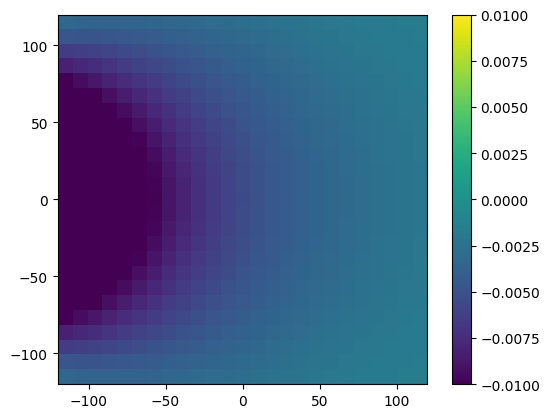

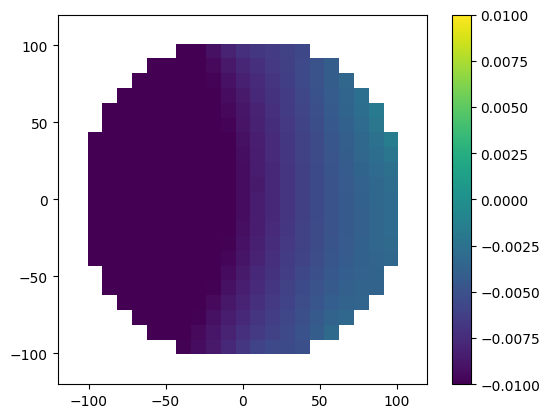

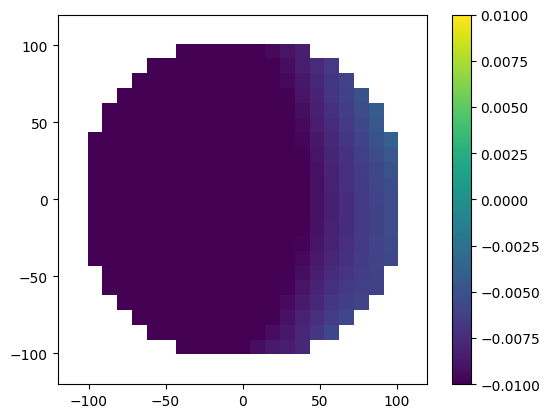

In [94]:

optimized_shim_Field = np.matmul(magnetFields[:,:,:,1,:], -np.sin(optimized_vector_of_magnet_rotations)) + np.matmul(magnetFields[:,:,:,2,:], np.cos(optimized_vector_of_magnet_rotations))


slicenr = 17
plt.imshow(optimized_shim_Field[slicenr,:,:],vmin=-1e-2,vmax=1e-2,origin='lower',extent=[-120,120,-120,120])
plt.colorbar()
plt.show()
plt.imshow(FieldMeasured[slicenr,:,:],origin='lower',vmin=-1e-2,vmax=1e-2,extent=[-120,120,-120,120])
plt.colorbar()
plt.show()

plt.imshow(FieldMeasured[slicenr,:,:]+optimized_shim_Field[slicenr,:,:],vmin=-1e-2,vmax=1e-2,origin='lower',extent=[-120,120,-120,120])
plt.colorbar()
plt.show()



In [107]:
# now do the least squares optimization
vector_of_magnet_rotations =np.load('banana_angles.npy')#
#vector_of_magnet_rotations = np.zeros(len(shimming_magnets))+np.pi#vector_of_magnet_rotations*0 ##
cost = _dataFitting(vector_of_magnet_rotations)

print(np.sum(cost))

# least squares optimization of the rotation vector
from scipy.optimize import least_squares

initialGuess = vector_of_magnet_rotations
#initialGuess[initialGuess<0.001] = 0.001
lsqData = least_squares(_dataFitting, initialGuess, max_nfev=6400, xtol = 1e-7,ftol=0, verbose=2,bounds=(initialGuess*0,initialGuess*0+2*np.pi))


3090138342105.5957
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.2021e+21                                    8.86e+13    
       1             13         3.2021e+21      0.00e+00       0.00e+00       8.86e+13    
`xtol` termination condition is satisfied.
Function evaluations 13, initial cost 3.2021e+21, final cost 3.2021e+21, first-order optimality 8.86e+13.


In [112]:
optimized_vector_of_magnet_rotations = lsqData.x
np.save('banana_angles.npy',optimized_vector_of_magnet_rotations)

print(optimized_vector_of_magnet_rotations*180/np.pi)
print(np.mean(optimized_vector_of_magnet_rotations*180/np.pi))


shimFieldRendered = shimming_magnets[0].B0[:,:,:,2]*0
    
for idx,angle in enumerate(optimized_vector_of_magnet_rotations):
    angle = np.pi/2 #!!!!
    opt_fld_one_magnet = magnetFields[:,:,:,2,idx]*np.cos(angle)-magnetFields[:,:,:,1,idx]*np.sin(angle)
    shimFieldRendered+=opt_fld_one_magnet

shimmed_Field_final = initialField+shimFieldRendered

homoinit = (np.nanmax(initialField)-np.nanmin(initialField))/np.nanmean(initialField)*1e6
homo_cheap = (np.nanmax(shimmed_Field_final)-np.nanmin(shimmed_Field_final))/np.nanmean(shimmed_Field_final)*1e6
print('homo cheap ppm %.0f -> %.0f'%(abs(homoinit),abs(homo_cheap)))
print('mean mT %.2f -> %.2f'%(abs(np.nanmin(initialField)),abs(np.nanmin(shimmed_Field_final))))


shimoffset = np.nanmean(shimmed_Field_final) - np.nanmean(initialField)
#d = np.shape(coordinate_grid[0])
#print(d[0])


[330.20186276 335.70209955 336.70976619 291.07943371 206.46642597
 204.69686957 209.63176319]
273.4983172772387
homo cheap ppm 3995127 -> 4856405
mean mT 0.05 -> 0.03


25


<Figure size 640x480 with 0 Axes>

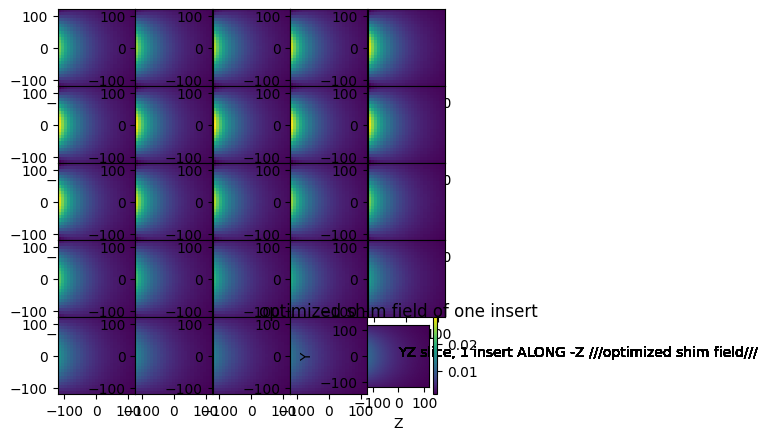

In [114]:
# SHIM FIELD
plt.figure(0)

mapsize = int(np.sqrt(len(FieldMeasured[:,0,0])))
fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))

xvals = b0map_banana.xDim_SPH_fine

shimoffset = 0# np.nanmean(shimmed_Field_final) - np.nanmean(initialField)
d = np.shape(coordinate_grid[0])
print(d[0])


for i in range(5):
    for j in range(5):
        xxx = axes[i,j].imshow(shimFieldRendered[i*5+j,:,:],clim=[np.nanmin(shimFieldRendered),np.nanmax(shimFieldRendered)],origin = 'lower',extent=[-120,120,-120,120])
        plt.text(-0,0,'YZ slice, 1 insert ALONG -Z ///optimized shim field///') #clim=[np.nanmin(shimFieldRendered),np.nanmax(shimFieldRendered)],
        axes[i,j].xaxis.set_visible(True)
        axes[i,j].yaxis.set_visible(True)
        plt.xlabel('Z')
        plt.ylabel('Y')

plt.subplots_adjust(wspace=0, hspace=0)
plt.title('optimized shim field of one insert')
plt.colorbar(mappable=xxx)
plt.savefig('./pics/ALL_INSERTS_ALONG_-Y_SIM.png',format="png")
plt.savefig('./pics/ALL_INSERTS_ALONG_-Y_SIM.pdf',format="pdf")


plt.show()



In [ ]:
# MAGNET ROTATIONS RING 0
#plotting rotations

ring_number = 0

plt.figure(0)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

plt.title('RING %d %.1f mm tray %d'%(ring_number,1e3*ringPosition,trays_occupied[ring_number]))
rdisp = 3e-2 # length of displayed rotation vector 
for idx,tmppos in enumerate(positions):
    if tmppos[0] == ringPosition:
        angle = optimized_vector_of_magnet_rotations[idx]
        print(tmppos[1],tmppos[2],angle*180/np.pi)
        axes.plot(tmppos[1],tmppos[2],'xk')
        direction = [rdisp*np.cos(angle),rdisp*np.sin(angle)]
        axes.plot(tmppos[1]+direction[0],tmppos[2]+direction[1],'rv')
        axes.plot([tmppos[1],tmppos[1]+direction[0]],[tmppos[2],tmppos[2]+direction[1]],'k-')
        

plt.grid(1)
plt.xlabel('Y')
plt.ylabel('Z')



In [ ]:
#?--- REALITY
#? --- REAL MAP RECORDED ---

In [ ]:
# --- REALITY IS: --- 
# one ring with fixed euler rotations, sim promises 2500 ppm
# 1. import the b0 map

import numpy as np  
import b0
b0map_test_ring_reality = b0.b0()
filename_to_import_csv_data_from = r'./data/240731/240828_onering_from_thursday_ball_R120_12pts_bvals_shigt.csv'
b0map_test_ring_reality.import_from_csv(filename_to_import_csv_data_from,eulers=[90,0,-90])
b0map_test_ring_reality.transfer_coordinates_of_the_path_from_cosi_to_magnet()


# change coordinates to magnet

In [ ]:
# spherical decomposition
diameter_of_sphere = b0map_test_ring_reality.path.radius*2
order = 17
resolution_of_sph_decomp = 10
print(diameter_of_sphere)

b0map_test_ring_reality.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)

resolution_of_sph_fit=8
print('interpolating field with sph order %d, resol %.0f mm'%(order,resolution_of_sph_fit))

b0map_test_ring_reality.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)


In [ ]:
# REAL field (interpolated)
# save REAL field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)


xvals = b0map_test_ring_reality.xDim_SPH_fine
ShimmedFieldMeasured = b0map_test_ring_reality.interpolatedField
mapsize = int(np.sqrt(len(ShimmedFieldMeasured[:,0,0])))

shimoffset = np.nanmean(ShimmedFieldMeasured)-np.nanmean(FieldMeasured)

fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))


print(np.nanmean(ShimmedFieldMeasured))

print(np.nanmin(ShimmedFieldMeasured),np.nanmax(ShimmedFieldMeasured))

for i in range(mapsize):
    for j in range(mapsize):
        xxx = axes[j,i].imshow(ShimmedFieldMeasured[i+j*mapsize,:,:],clim=[np.nanmin(FieldMeasured)+shimoffset,np.nanmax(FieldMeasured)+shimoffset],origin='lower')
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)

measuredHomo = abs((np.nanmax(ShimmedFieldMeasured)-np.nanmin(ShimmedFieldMeasured))/np.nanmean(ShimmedFieldMeasured)*1e6)
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('SHIMMED measured\n%.0f ppm'%measuredHomo)

plt.savefig('./pics/iter2_onering_real_field.png',format="png")
plt.savefig('./pics/iter2_onering_real_field.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()

In [ ]:
# now lets get the measured field with the simulation using the rotations and varying the strength
# SHIMMED field
plt.figure(0)

mapsize = int(np.sqrt(len(FieldMeasured[:,0,0])))
fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))

xvals = b0map_banana.xDim_SPH_fine



d = np.shape(coordinate_grid[0])
print(d[0])

#!!! TST !!!
shimFieldRendered = shimming_magnets[0].B0[:,:,:,2]*0
for idx, magnet in enumerate(shimming_magnets):
    alpha = optimized_vector_of_magnet_rotations[idx]
    print(alpha)
    magnet.rotation_yz = alpha#+(np.pi/2-abs(alpha-np.pi/2))*1.41#+2*np.pi/4
    magnet.bRem = NEW_B_REM*1
    pos = positions[idx]
    magnet.position = [pos[0],pos[1],pos[2]]
    magnet.render_field(grid=coordinate_grid)
    shimFieldRendered += magnet.B0[:,:,:,2]#magnet.B0[:,:,:,1]*np.sin(alpha)+magnet.B0[:,:,:,2]*np.cos(alpha)

shimmed_Field_final = initialField+shimFieldRendered*1.0e3#[:,:,:]*1+np.multiply(shimFieldRendered[:,:,:,2]*1000,lsqData.x)#+shimFieldRendered[:,:,:,1]*1000 #???? why 1st not 2nd component!?!!s


#!!!!!!!!!!!!

homoshimmed = abs((np.nanmax(shimmed_Field_final)-np.nanmin(shimmed_Field_final))/np.nanmean(shimmed_Field_final)*1e6)
shimoffset = np.nanmean(shimmed_Field_final) - np.nanmean(initialField)
print('shimmed simulated HOMO,ppm:',homoshimmed)

for i in range(mapsize):
    for j in range(mapsize):
        xxx = axes[j,i].imshow(shimmed_Field_final[i+j*mapsize,:,:],clim=[1.00*np.nanmin(initialField)+shimoffset,1.00*np.nanmax(initialField)+shimoffset],origin='lower')
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('SHIMMED var simulated\n%.0f ppm'%homoshimmed)

plt.savefig('./pics/shimmed_field_ITER2_1ring.png',format="png")
plt.savefig('./pics/shimmed_field_ITER2_1ring.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()

 

In [ ]:
# difference between measured shimmed and intial
diff_measured_field = shimmed_Field_final-ShimmedFieldMeasured
plt.figure(0)

mapsize = int(np.sqrt(len(diff_measured_field[:,0,0])))
fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))

xvals = b0map_banana.xDim_SPH_fine



d = np.shape(coordinate_grid[0])
print(d[0])

g=3e-2

for i in range(mapsize):
    for j in range(mapsize):
        xxx = axes[j,i].imshow(diff_measured_field[i+j*mapsize,:,:],clim=[-g,g])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('VARSIM - REALMEAS')

plt.savefig('./pics/diff_field_ITER2_1ring.png',format="png")
plt.savefig('./pics/diff_field_ITER2_1ring.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()

